## Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
os.chdir("D:/")

## Data Collection and Data Pre-processing

In [3]:
df=pd.read_csv("heart_disease_data.csv")

In [4]:
# print first 5 row of dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
# print number of row and column
df.shape

(303, 14)

In [5]:
# show basic informmation of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# show statistical measure of dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# check null value of dataset
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

1    165
0    138
Name: target, dtype: int64


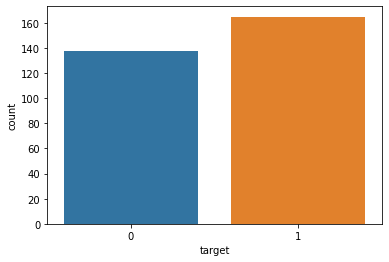

In [9]:
sns.countplot("target",data=df)
print(df["target"].value_counts())

In [10]:
corr=df.corr()

<AxesSubplot:>

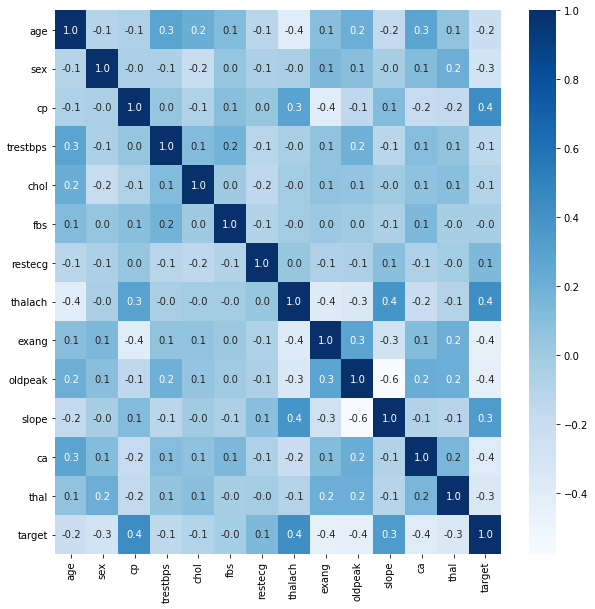

In [13]:
# craete heatmap to easy understand correlation
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,fmt=".1f",cmap="Blues")

In [15]:
# separate the data and label
x=df.drop("target",axis=1)
y=df.target

## Train Test Split

In [16]:
# load Train Test Split library
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=10)

In [18]:
print(x.shape,x_train.shape,x_test.shape)

(303, 13) (242, 13) (61, 13)


## Model Building
## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [20]:
# model train on Training data
model.fit(x_train,y_train)

LogisticRegression()

In [21]:
from sklearn.metrics import accuracy_score

In [24]:
# check Accuracy Score on Training data
y_train_pred=model.predict(x_train)
y_train_accuracy=accuracy_score(y_train,y_train_pred)
print("Train Accuracy Score:",y_train_accuracy)

Train Accuracy Score: 0.8471074380165289


In [25]:
# check accuracy score on test data
y_test_pred=model.predict(x_test)
y_test_accuracy=accuracy_score(y_test,y_test_pred)
print("Test Accuracy Score:",y_test_accuracy)

Test Accuracy Score: 0.8852459016393442


## Making a Predictive System

In [27]:
input_data=(59,1,0,170,326,0,0,140,1,3.4,0,0,3)

# convert input data to numpy array
input_data_numpy_array=np.asarray(input_data)

# reshape the numpy array
input_data_reshape=input_data_numpy_array.reshape(1,-1)

# prediction input data
prediction=model.predict(input_data_reshape)
print(prediction)

if (prediction[0]==0):
    print("The Patient is not Heart Disease")
else:
    print("The Patient is Heart Disease")

[0]
The Patient is not Heart Disease
